## Exploratory Data Analysis - Food Delivery Time Dataset
### Introduction
This notebook analyzes the food delivery dataset to understand patterns, data quality, and feature relationships. We examine 1000 delivery records with 9 features to identify key factors affecting delivery times and guide preprocessing decisions.

**Author:** NGUYEN Ngoc Dang Nguyen - Final-year Student in Computer Science, Aix-Marseille University

**EDA Steps:**
1. Load Libraries and Data
2. Dataset Overview
3. Missing Values Analysis
4. Target Variable Analysis
5. Catgorical Features
6. Numerical Features
7. Feature Relationship
8. Outlier Detection

### 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

df = pd.read_csv("../data/raw/Food_Delivery_Times.csv")
df.columns = df.columns.str.strip()

print(f"Dataset loaded: {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Dataset loaded: 1000 rows and 9 columns


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### 2. Dataset Overview

In [27]:
print(f"Dataset size: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")
print("\nColumns names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nData types:")
print(df.dtypes)

print("\nQuick statistics:")
df.describe()

Dataset size: 280.2 KB

Columns names:
 1. Order_ID
 2. Distance_km
 3. Weather
 4. Traffic_Level
 5. Time_of_Day
 6. Vehicle_Type
 7. Preparation_Time_min
 8. Courier_Experience_yrs
 9. Delivery_Time_min

Data types:
Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

Quick statistics:


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### 3. Missing Values Analysis

Missing values:
Weather                   30
Traffic_Level             30
Time_of_Day               30
Courier_Experience_yrs    30
dtype: int64

Missing percentage:
Weather: 3.0%
Traffic_Level: 3.0%
Time_of_Day: 3.0%
Courier_Experience_yrs: 3.0%


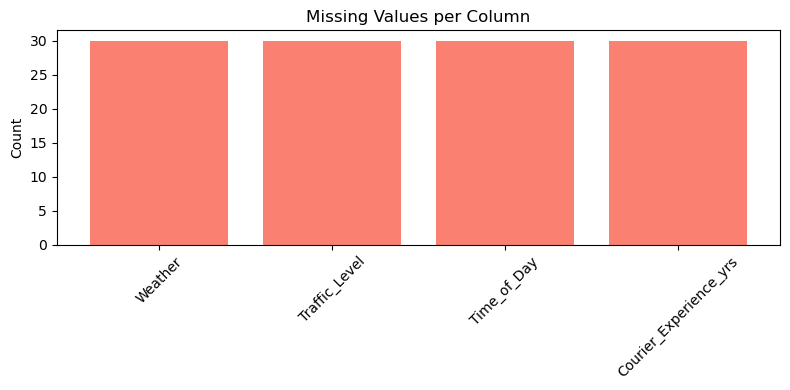


Rows with missing data: 117
Sample rows with missing values:
    Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
6        627         9.52   Clear           Low         NaN         Bike   
14       939         2.80   Clear          High     Morning      Scooter   
24       211        11.20   Clear        Medium     Morning         Bike   

    Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
6                     12                     1.0                 49  
14                    10                     NaN                 33  
24                    23                     NaN                 73  


In [35]:
missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    print("Missing values:")
    print(missing)

    print("\nMissing percentage:")
    missing_pct = (missing / len(df)) * 100
    for col, pct in missing_pct.items():
        print(f"{col}: {pct:.1f}%")

    plt.figure(figsize=(8, 4))
    plt.bar(missing.index, missing.values, color='salmon')
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    missing_rows = df.isnull().any(axis=1).sum()
    print(f"\nRows with missing data: {missing_rows}")
    print("Sample rows with missing values:")
    print(df[df.isnull().any(axis=1)].head(3))
else:
    print("No missing values found.")


### 4. Target Variable Analysis

Average delivery time: 56.73
Median delivery time: 55.50
Price delivery time: 8.00 to 153.00
Standard deviation: 22.07


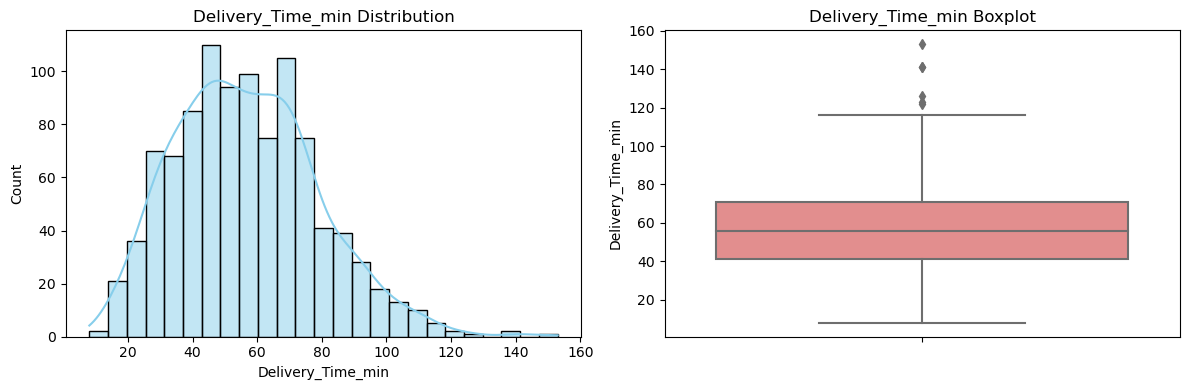

In [36]:
print(f"Average delivery time: {df['Delivery_Time_min'].mean():.2f}")
print(f"Median delivery time: {df['Delivery_Time_min'].median():.2f}")
print(f"Price delivery time: {df['Delivery_Time_min'].min():.2f} to {df['Delivery_Time_min'].max():.2f}")
print(f"Standard deviation: {df['Delivery_Time_min'].std():.2f}")

target = 'Delivery_Time_min'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[target], bins=25, kde=True, color='skyblue')
plt.title(f"{target} Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target], color='lightcoral')
plt.title(f"{target} Boxplot")

plt.tight_layout()
plt.show()

### 5. Categorical Features

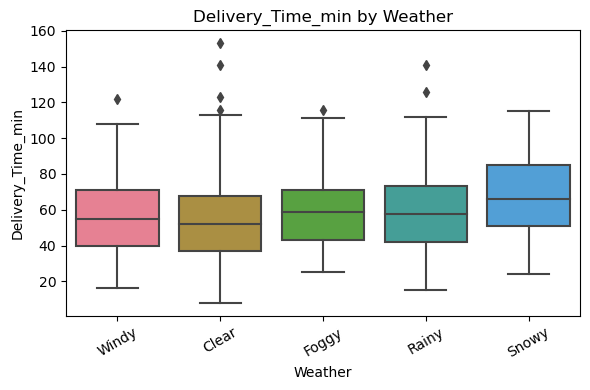

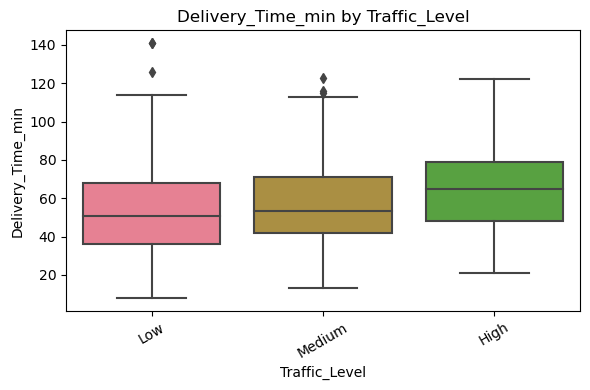

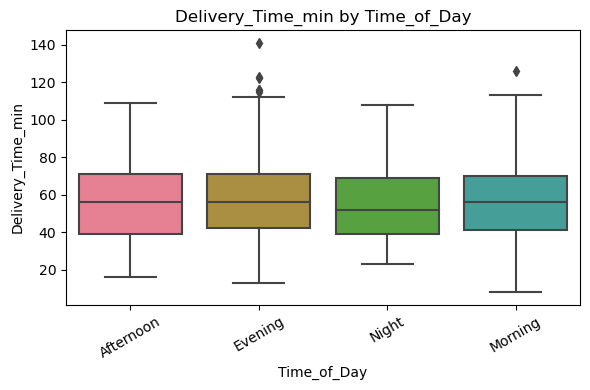

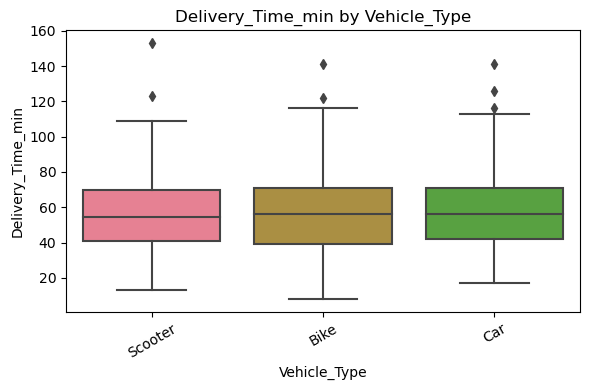

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f"{target} by {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

### 6. Numerical Features

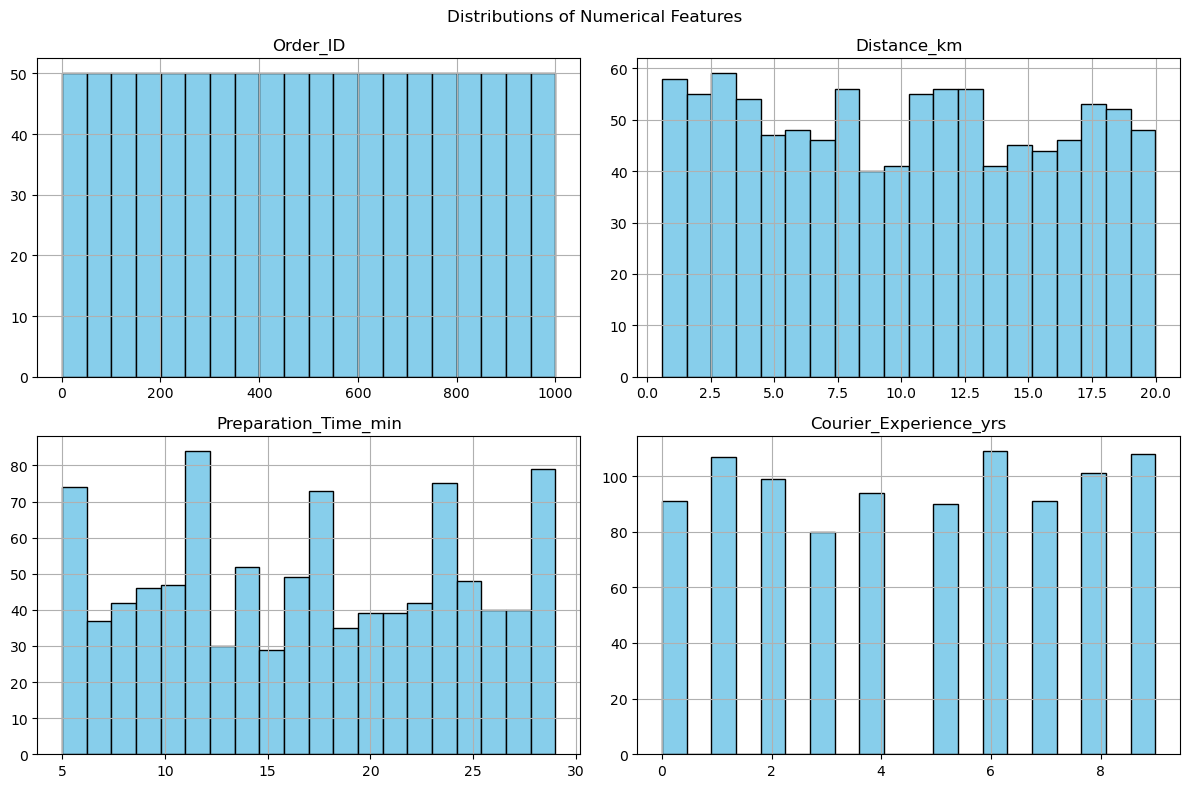

In [ ]:
num_cols = df.select_dtypes(include=np.number).drop(columns=[target], errors='ignore')
if num_cols.shape[1] == 0:
    print("No numerical features to plot.")
else:
    num_cols.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
    plt.suptitle("Distributions of Numerical Features")
    plt.tight_layout()
    plt.show()

### 7. Feature Relationship

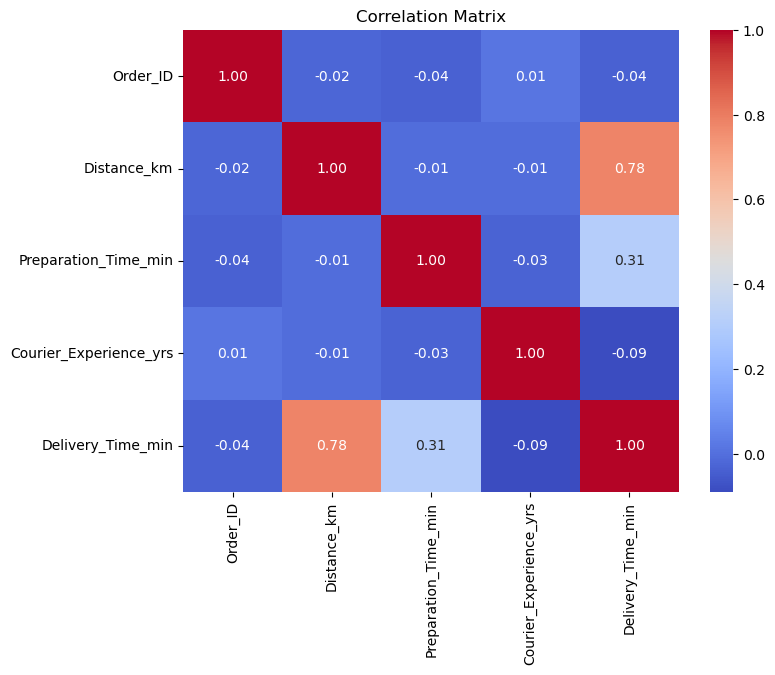

Top correlations with delivery time:
Distance_km             0.780998
Preparation_Time_min    0.307350
Order_ID               -0.036650
Name: Delivery_Time_min, dtype: float64


In [37]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

print("Top correlations with delivery time:")
print(corr['Delivery_Time_min'].sort_values(ascending=False)[1:4])

### 8. Outlier Detection

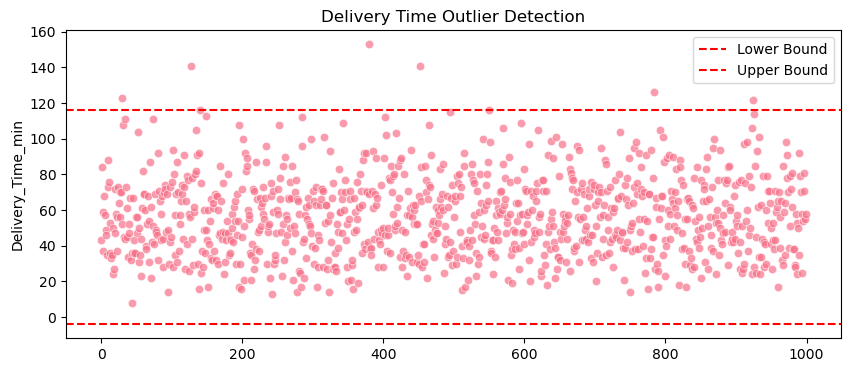

Number of outliers: 6 / 1000 (0.6%)


In [ ]:
Q1, Q3 = df[target].quantile([0.25, 0.75])
IQR = Q3 - Q1
low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

plt.figure(figsize=(10, 4))
sns.scatterplot(x=range(len(df)), y=df[target], alpha=0.7)
plt.axhline(low, color='r', linestyle='--', label='Lower Bound')
plt.axhline(high, color='r', linestyle='--', label='Upper Bound')
plt.title("Delivery Time Outlier Detection")
plt.legend()
plt.show()

outliers = df[(df[target] < low) | (df[target] > high)]
print(f"Number of outliers: {len(outliers)} / {len(df)} ({len(outliers)/len(df)*100:.1f}%)")

### Conclusion
Analysis reveals 1000 delivery records with minimal missing data (3%). Distance_km is the strongest predictor (0.78 correlation), followed by Preparation_Time_min (0.31). Delivery time shows normal distribution with mean 56.7 minutes. The dataset quality is excellent for machine learning development.